Run each cell in the notebook. The explanation of the cells are given on top respectively

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the data from the given dataset

In [45]:
data = pd. read_csv('housing_price_data.txt', header = None)

Converting the data into individual columns and then converting it into a numpy array

In [46]:
x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values
y = data.iloc[:, 2].values

Finding the range of values in the given data

In [49]:
min_x1 = min(x1)
min_x2 = min(x2)
min_y = min(y)
range_x1 = max(x1)- min(x1)
range_x2 = max(x2) - min(x2)
range_y = max(y) - min(y)

Here we perform Feature scaling. I have used min-max scaling to reduce all the values to 0-1 range for our further calculations

In [53]:
X1 = []
X2 = []
Y = []
for i in range(len(x1)):
    X1.append((x1[i]-min_x1)/range_x1)
    X2.append((x2[i]-min_x2)/range_x2)   # Reducing values to range 0-1
    Y.append((y[i]-min_y)/range_y)  

Here we perform the gradient descent algorithm. m1, m2 and c are the gradient descent parameters. We calculate the parameters and update them simultaneously in each step. The update is done by calculating partial differential of the cost function with respect to each of the parameters. The cost function is stored in the cost_func array. The J_arr array is created to help in plotting the cost functions. It simply stores the epoch number. In the end, I have printed the final linear regression equation which shows the final calculated parameters. The epochs and the learning rate L can be set by the user.

In [67]:
m1 = m2 = c = 0    #the gradient descent parameters
L = 0.001  # The learning Rate
epochs = 10000   #Number of times to perform linear regression
cost_func = []
cost_sum = 0
J_arr = []
count = 0
n = float(len(X1)) # Number of elements in X
# Performing Gradient Descent
for j in range (epochs):
    for i in range(len(X1)): 
        Y_pred = m1*X1[i] + m2*X2[i] +  c            # The current predicted value of Y
        diff_Y = Y[i] - Y_pred
        D_m1 = (-2/n) * (X1[i] * diff_Y)  # Derivative wrt m1
        D_m2 = (-2/n) * (X2[i] * diff_Y)  # Derivative wrt m2
        D_c = (-2/n) * diff_Y  # Derivative wrt c
        m1 = m1 - L * D_m1  # Update m1
        m2 = m2 - L * D_m2  # Update m1
        c = c - L * D_c  # Update c
        cost_sum += np.square(diff_Y)
    cost = cost_sum/(n*2)
    cost_func.append(cost)
    cost_sum = 0
    J_arr.append(count)
    count+= 1
        
print('--------------------------Equation--------------------------------------------')    
print ('Y =',m1,'*X1 +',m2,'*X2 +', c)

--------------------------Equation--------------------------------------------
Y = 0.512664448679242 *X1 + 0.16903320143781675 *X2 + 0.07193516038472995


Plotting the cost function as a function of the gradient descent iterations. We can see that the cost function decreases very fast initially but after a certain number of iterations the rate of decrease is much less which indicates that our linear regression line is gradually becomming closer to the actual value, hence the error is reducing asymptotically.

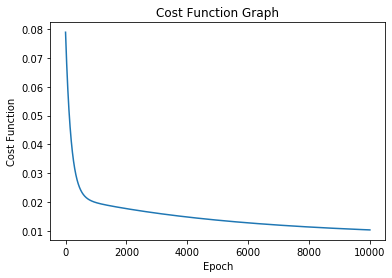

In [71]:
plt.title('Cost Function Graph')
plt.xlabel('Epoch')
plt.ylabel('Cost Function')
plt.plot(J_arr, cost_func)
plt.show()

Here the user can give their own input. The size of the house can be set with a1 and the number of bedrooms with a2. The predicted housing price using our model is displayed as output. 

In [73]:
a1 = 2104
a2 = 3
a1_mod = (a1-min_x1)/range_x1
a2_mod = (a2-min_x2)/range_x2
predict_mod = m1*a1_mod + m2*a2_mod +c
predicted_actual = predict_mod*range_y + min_y
print('Housing price = $',predicted_actual)

Housing price = $ 346637.3102645747
